<a href="https://colab.research.google.com/github/DanielAndresSmg/Home-Credit-Default-Risk/blob/main/Chapter_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Library


In [ ]:
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd 

# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder

# File system manangement
import os

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns
import gc

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
d1 = pd.read_csv('/content/drive/MyDrive/Dataset/Project/application_train.csv')
d2 = pd.read_csv('/content/drive/MyDrive/Dataset/Project/application_test.csv')
d3 = pd.read_csv('/content/drive/MyDrive/Dataset/Project/bureau.csv')
d4 = pd.read_csv('/content/drive/MyDrive/Dataset/Project/bureau_balance.csv')
# d5 = pd.read_csv('/content/drive/MyDrive/Dataset/Project/installments_payments.csv')
# d6 = pd.read_csv('/content/drive/MyDrive/Dataset/Project/credit_card_balance.csv')

In [ ]:
# d7 = pd.read_csv('/content/drive/MyDrive/Dataset/Project/POS_CASH_balance.csv')

# Selection Feature

In [ ]:
selec = ['SK_ID_CURR','TARGET','DAYS_EMPLOYED','NAME_CONTRACT_TYP','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','REGION_POPULATION_RELATIVE','DAYS_BIRTH','OCCUPATION_TYPE','CNT_FAM_MEMBERS','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','WEEKDAY_APPR_PROCESS_START','EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE','FLAG_DOCUMENT_2','FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6','FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21']
selec2 = ['SK_ID_CURR','DAYS_EMPLOYED','NAME_CONTRACT_TYP','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','REGION_POPULATION_RELATIVE','DAYS_BIRTH','OCCUPATION_TYPE','CNT_FAM_MEMBERS','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','WEEKDAY_APPR_PROCESS_START','EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE','FLAG_DOCUMENT_2','FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6','FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21']

In [ ]:
d1 = pd.DataFrame(d1,columns=selec)
d2 = pd.DataFrame(d2,columns=selec2)

In [ ]:
d1 = d1[d1['CODE_GENDER'] != 'XNA']
d2 = d2[d2['CODE_GENDER'] != 'XNA']

In [ ]:
d1["APP_NEW_AGE_DAYS_EMP"] = d1["DAYS_EMPLOYED"] / (- 365.25)
d2["APP_NEW_AGE_DAYS_EMP"] = d2["DAYS_EMPLOYED"] / (- 365.25)

# App_train & App_Test

In [ ]:
d1.dtypes.value_counts()

int64      27
float64    15
object     10
dtype: int64

In [ ]:
d1.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

CODE_GENDER                    2
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
dtype: int64

In [ ]:
d1.describe(include=[np.object])

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START
count,307507,307507,307507,306215,307507,307507,307507,307507,211118,307507
unique,2,2,2,7,8,5,6,6,18,7
top,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,Laborers,TUESDAY
freq,202448,202922,213308,248523,158771,218389,196429,272865,55186,53900


In [ ]:
from sklearn.preprocessing import LabelEncoder
lbl=LabelEncoder()
lbl_count=0
for i in d1:
    if d1[i].dtype=='object':
        if len(list(d1[i].unique())) <= 2:
            lbl.fit(d1[i])
            #through this code we encode only those column who have less 
            #than or equal to 2 categorical variable
            d1[i]=lbl.transform(d1[i])
            d2[i]=lbl.transform(d2[i])
            lbl_count +=1
print('%d column were encoded.'%lbl_count)

3 column were encoded.


In [ ]:
# use one-hot encoding for remaining categorical variables
d1 = pd.get_dummies(d1)
print('dataset data shape: ', d1.shape)

dataset data shape:  (307507, 102)


In [ ]:
# use one-hot encoding for remaining categorical variables
d2 = pd.get_dummies(d2)
print('dataset data shape: ', d2.shape)

dataset data shape:  (48744, 99)


In [ ]:
# Nyamain isi dalam colomnya 
train_target=d1['TARGET']
d1,d2=d1.align(d2,axis=1,join='inner')
d1['TARGET'] = train_target

In [ ]:
d1.dtypes.value_counts()

uint8      55
int64      30
float64    15
dtype: int64

In [ ]:
d1.shape

(307507, 100)

In [ ]:
d2.shape

(48744, 99)

In [ ]:
# create new variables
d1['EMPLOY_AGE'] = d1['DAYS_EMPLOYED'] / d1['DAYS_BIRTH']
d1['INCOME_AGE'] = d1['AMT_INCOME_TOTAL'] / d1['DAYS_BIRTH']
d1['CREDIT_AGE'] = d1['AMT_CREDIT'] / d1['DAYS_BIRTH']
d1['CREDIT_INCOME'] = d1['AMT_CREDIT'] / d1['AMT_INCOME_TOTAL']
d1['ANNUITY_INCOME'] = d1['AMT_ANNUITY'] / d1['AMT_INCOME_TOTAL']
d1['ANNUITY_CREDIT'] = d1['AMT_ANNUITY'] / d1['AMT_CREDIT']

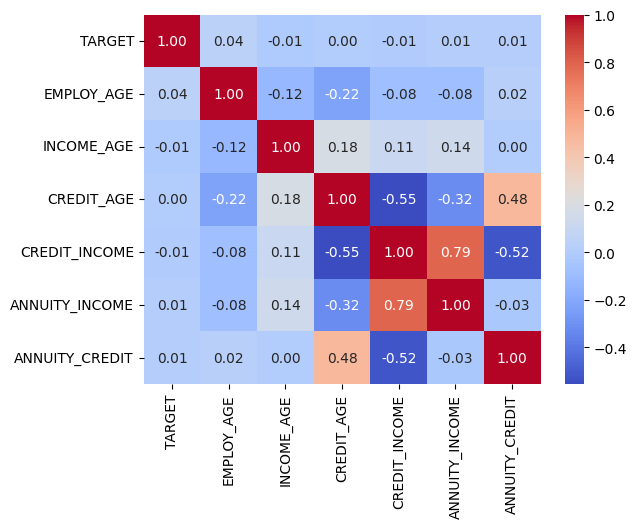

In [ ]:
# let's look at the correlations of the new variables we created along with TARGET
g = sns.heatmap(d1[['TARGET','EMPLOY_AGE','INCOME_AGE','CREDIT_AGE','CREDIT_INCOME','ANNUITY_INCOME','ANNUITY_CREDIT']].corr(),annot=True, fmt = ".2f", cmap = "coolwarm")

# Bureu

## Merge to App_train

In [ ]:
print('bureau data shape: ', d3.shape)

bureau data shape:  (1716428, 17)


### COUNT

In [ ]:
# the first item to look at is how many records are in this for each applicant
BUREAU_count = d3.groupby('SK_ID_CURR', as_index=False)['SK_ID_BUREAU'].count().rename(columns = {'SK_ID_BUREAU': 'bureau_count'})
(BUREAU_count['bureau_count']).describe()

count    305811.000000
mean          5.612709
std           4.430354
min           1.000000
25%           2.000000
50%           4.000000
75%           8.000000
max         116.000000
Name: bureau_count, dtype: float64

In [ ]:
d1 = d1.merge(BUREAU_count, on = 'SK_ID_CURR', how = 'left')
corr = d1['TARGET'].corr(d1['bureau_count'])
print('%.4f' % corr)

0.0041


### DAYS_CREDIT

In [ ]:
DAYS_CREDIT_max = d3.groupby('SK_ID_CURR', as_index=False)['DAYS_CREDIT'].max().rename(columns = {'DAYS_CREDIT': 'bureau_DAYS_CREDIT_max'})
DAYS_CREDIT_max.head()

,SK_ID_CURR,bureau_DAYS_CREDIT_max
0,100001,-49
1,100002,-103
2,100003,-606
3,100004,-408
4,100005,-62


In [ ]:
# merge with the d1
d1 = d1.merge(DAYS_CREDIT_max, on = 'SK_ID_CURR', how = 'left')
# what is the correlation of our new variable with TARGET
corr = d1['TARGET'].corr(d1['bureau_DAYS_CREDIT_max'])
print('%.4f' % corr)

0.0498


### CREDIT_DAY_OVERDUE

In [ ]:
d3.CREDIT_DAY_OVERDUE.value_counts()

0       1712211
30          311
60          126
8           103
13          103
         ...   
1445          1
278           1
707           1
2193          1
1931          1
Name: CREDIT_DAY_OVERDUE, Length: 942, dtype: int64

In [ ]:
CREDIT_DAY_OVERDUE_max = d3.groupby('SK_ID_CURR', as_index=False)['CREDIT_DAY_OVERDUE'].max().rename(columns = {'CREDIT_DAY_OVERDUE': 'bureau_CREDIT_DAY_OVERDUE_max'})

In [ ]:
CREDIT_DAY_OVERDUE_max[CREDIT_DAY_OVERDUE_max['bureau_CREDIT_DAY_OVERDUE_max'] == 0].count()

SK_ID_CURR                       301947
bureau_CREDIT_DAY_OVERDUE_max    301947
dtype: int64

In [ ]:
CREDIT_DAY_OVERDUE_max[CREDIT_DAY_OVERDUE_max['bureau_CREDIT_DAY_OVERDUE_max'] > 0].count()

SK_ID_CURR                       3864
bureau_CREDIT_DAY_OVERDUE_max    3864
dtype: int64

In [ ]:
# let's turn this into a flag, since 99% of the data is zero
CREDIT_DAY_OVERDUE_max['bureau_CREDIT_DAY_OVERDUE_max_flag'] = CREDIT_DAY_OVERDUE_max['bureau_CREDIT_DAY_OVERDUE_max'].where(CREDIT_DAY_OVERDUE_max['bureau_CREDIT_DAY_OVERDUE_max']==0,other=1)

In [ ]:
CREDIT_DAY_OVERDUE_max.head()

,SK_ID_CURR,bureau_CREDIT_DAY_OVERDUE_max,bureau_CREDIT_DAY_OVERDUE_max_flag
0,100001,0,0
1,100002,0,0
2,100003,0,0
3,100004,0,0
4,100005,0,0


In [ ]:
# drop the max variable and merge in the flag
CREDIT_DAY_OVERDUE_max = CREDIT_DAY_OVERDUE_max.drop('bureau_CREDIT_DAY_OVERDUE_max', axis=1)
d1 = d1.merge(CREDIT_DAY_OVERDUE_max, on = 'SK_ID_CURR', how = 'left')

In [ ]:
corr = d1['TARGET'].corr(d1['bureau_CREDIT_DAY_OVERDUE_max_flag'])
print('%.4f' % corr)

0.0350


### DAYS_CREDIT_ENDDATE

In [ ]:
# let's take the max of this variable
DAYS_CREDIT_ENDDATE_max = d3.groupby('SK_ID_CURR', as_index=False)['DAYS_CREDIT_ENDDATE'].max().rename(columns = {'DAYS_CREDIT_ENDDATE': 'bureau_DAYS_CREDIT_ENDDATE_max'})
# (DAYS_CREDIT_ENDDATE_max['bureau_DAYS_CREDIT_ENDDATE_max']).describe()
DAYS_CREDIT_ENDDATE_max.head()

,SK_ID_CURR,bureau_DAYS_CREDIT_ENDDATE_max
0,100001,1778.0
1,100002,780.0
2,100003,1216.0
3,100004,-382.0
4,100005,1324.0


In [ ]:
DAYS_CREDIT_ENDDATE_max['bureau_DAYS_CREDIT_ENDDATE_max_outlier'] = DAYS_CREDIT_ENDDATE_max['bureau_DAYS_CREDIT_ENDDATE_max'] < -10000
for i in DAYS_CREDIT_ENDDATE_max['bureau_DAYS_CREDIT_ENDDATE_max']:
    if i < -10000:
        DAYS_CREDIT_ENDDATE_max['bureau_DAYS_CREDIT_ENDDATE_max'].replace({i: np.nan}, inplace = True)

In [ ]:
# Function to calculate missing values by column# Funct 
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [ ]:
missing_values_table(DAYS_CREDIT_ENDDATE_max)

Your selected dataframe has 3 columns.
There are 1 columns that have missing values.


,Missing Values,% of Total Values
bureau_DAYS_CREDIT_ENDDATE_max,2588,0.8


In [ ]:
d1 = d1.merge(DAYS_CREDIT_ENDDATE_max, on = 'SK_ID_CURR', how = 'left')

In [ ]:
corr = d1['TARGET'].corr(d1['bureau_DAYS_CREDIT_ENDDATE_max'])
print('%.4f' % corr)

0.0366


### DAYS_ENDDATE_FACT

In [ ]:
# let's take the average of this variable
DAYS_ENDDATE_FACT_mean = d3.groupby('SK_ID_CURR', as_index=False)['DAYS_ENDDATE_FACT'].mean().rename(columns = {'DAYS_ENDDATE_FACT': 'bureau_DAYS_ENDDATE_FACT_mean'})
(DAYS_ENDDATE_FACT_mean['bureau_DAYS_ENDDATE_FACT_mean']).head()


0    -825.500000
1    -697.500000
2   -1097.333333
3    -532.500000
4    -123.000000
Name: bureau_DAYS_ENDDATE_FACT_mean, dtype: float64

In [ ]:
# it appears that we have a few outliers around -8000 days that we can handle
DAYS_ENDDATE_FACT_mean['bureau_DAYS_ENDDATE_FACT_mean_outlier'] = DAYS_ENDDATE_FACT_mean['bureau_DAYS_ENDDATE_FACT_mean'] < -4000
for i in DAYS_ENDDATE_FACT_mean['bureau_DAYS_ENDDATE_FACT_mean']:
    if i < -4000:
        DAYS_ENDDATE_FACT_mean['bureau_DAYS_ENDDATE_FACT_mean'].replace({i: np.nan}, inplace = True)

In [ ]:
# merge both our mean variable and outlier flag into the d1
d1 = d1.merge(DAYS_ENDDATE_FACT_mean, on = 'SK_ID_CURR', how = 'left')

In [ ]:
corr = d1['TARGET'].corr(d1['bureau_DAYS_ENDDATE_FACT_mean'])
print('%.4f' % corr)

0.0532


### AMT_CREDIT_MAX_OVERDUE

In [ ]:
# let's take the max of this variable
AMT_CREDIT_MAX_OVERDUE_max = d3.groupby('SK_ID_CURR', as_index=False)['AMT_CREDIT_MAX_OVERDUE'].max().rename(columns = {'AMT_CREDIT_MAX_OVERDUE': 'bureau_AMT_CREDIT_MAX_OVERDUE_max'})
(AMT_CREDIT_MAX_OVERDUE_max['bureau_AMT_CREDIT_MAX_OVERDUE_max']).describe()

count    2.129710e+05
mean     9.012276e+03
std      3.431858e+05
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      5.749065e+03
max      1.159872e+08
Name: bureau_AMT_CREDIT_MAX_OVERDUE_max, dtype: float64

In [ ]:
# I'm also curious on the average of this variable
AMT_CREDIT_MAX_OVERDUE_mean = d3.groupby('SK_ID_CURR', as_index=False)['AMT_CREDIT_MAX_OVERDUE'].mean().rename(columns = {'AMT_CREDIT_MAX_OVERDUE': 'bureau_AMT_CREDIT_MAX_OVERDUE_mean'})
(AMT_CREDIT_MAX_OVERDUE_mean['bureau_AMT_CREDIT_MAX_OVERDUE_mean']).describe()

count    2.129710e+05
mean     5.004934e+03
std      2.856819e+05
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      2.063745e+03
max      1.159872e+08
Name: bureau_AMT_CREDIT_MAX_OVERDUE_mean, dtype: float64

In [ ]:
# I'm not sure which of these two variables may work better in this case, so let's bring them both into the dataset for now
d1 = d1.merge(AMT_CREDIT_MAX_OVERDUE_max, on = 'SK_ID_CURR', how = 'left')
d1 = d1.merge(AMT_CREDIT_MAX_OVERDUE_mean, on = 'SK_ID_CURR', how = 'left')

In [ ]:
# Corr
corr_max = d1['TARGET'].corr(d1['bureau_AMT_CREDIT_MAX_OVERDUE_max'])
corr_mean = d1['TARGET'].corr(d1['bureau_AMT_CREDIT_MAX_OVERDUE_mean'])
print('correlation for max variable: %.4f' % corr_max)
print('correlation for mean variable: %.4f' % corr_mean)


correlation for max variable: 0.0025
correlation for mean variable: 0.0024


### CNT_CREDIT_PROLONG

In [ ]:
# since these are counts, let's sum this variable
CNT_CREDIT_PROLONG_sum = d3.groupby('SK_ID_CURR', as_index=False)['CNT_CREDIT_PROLONG'].sum().rename(columns = {'CNT_CREDIT_PROLONG': 'bureau_CNT_CREDIT_PROLONG_sum'})
(CNT_CREDIT_PROLONG_sum['bureau_CNT_CREDIT_PROLONG_sum']).describe()

count    305811.000000
mean          0.035980
std           0.232951
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           9.000000
Name: bureau_CNT_CREDIT_PROLONG_sum, dtype: float64

In [ ]:
# merge into our dataset
d1 = d1.merge(CNT_CREDIT_PROLONG_sum, on = 'SK_ID_CURR', how = 'left')
corr = d1['TARGET'].corr(d1['bureau_CNT_CREDIT_PROLONG_sum'])
print('%.4f' % corr)

0.0041


### AMT_CREDIT_SUM

In [ ]:
AMT_CREDIT_SUM_mean = d3.groupby('SK_ID_CURR', as_index=False)['AMT_CREDIT_SUM'].mean().rename(columns = {'AMT_CREDIT_SUM': 'bureau_AMT_CREDIT_SUM_mean'})
(AMT_CREDIT_SUM_mean['bureau_AMT_CREDIT_SUM_mean']).describe()

count    3.058090e+05
mean     3.807398e+05
std      8.792865e+05
min      0.000000e+00
25%      1.039616e+05
50%      1.972972e+05
75%      3.978647e+05
max      1.980723e+08
Name: bureau_AMT_CREDIT_SUM_mean, dtype: float64

In [ ]:
# merge into our dataset
d1 = d1.merge(AMT_CREDIT_SUM_mean, on = 'SK_ID_CURR', how = 'left')
corr = d1['TARGET'].corr(d1['bureau_AMT_CREDIT_SUM_mean'])
print('%.4f' % corr)

-0.0200


### AMT_CREDIT_SUM_DEBT

In [ ]:
# since these are amounts, let's average this variable
AMT_CREDIT_SUM_DEBT_mean = d3.groupby('SK_ID_CURR', as_index=False)['AMT_CREDIT_SUM_DEBT'].mean().rename(columns = {'AMT_CREDIT_SUM_DEBT': 'bureau_AMT_CREDIT_SUM_DEBT_mean'})
(AMT_CREDIT_SUM_DEBT_mean['bureau_AMT_CREDIT_SUM_DEBT_mean']).describe()

count    2.974390e+05
mean     1.616341e+05
std      5.367677e+05
min     -1.083615e+06
25%      0.000000e+00
50%      4.476038e+04
75%      1.436004e+05
max      5.175000e+07
Name: bureau_AMT_CREDIT_SUM_DEBT_mean, dtype: float64

In [ ]:
# merge into our dataset and look at the correlation
d1 = d1.merge(AMT_CREDIT_SUM_DEBT_mean, on = 'SK_ID_CURR', how = 'left')
corr = d1['TARGET'].corr(d1['bureau_AMT_CREDIT_SUM_DEBT_mean'])
print('%.4f' % corr)

-0.0006


### AMT_CREDIT_SUM_LIMIT

In [ ]:
AMT_CREDIT_SUM_LIMIT_mean = d3.groupby('SK_ID_CURR', as_index=False)['AMT_CREDIT_SUM_LIMIT'].mean().rename(columns = {'AMT_CREDIT_SUM_LIMIT': 'bureau_AMT_CREDIT_SUM_LIMIT_mean'})
(AMT_CREDIT_SUM_LIMIT_mean['bureau_AMT_CREDIT_SUM_LIMIT_mean']).describe()

count    2.805030e+05
mean     5.898539e+03
std      2.992182e+04
min     -9.789166e+04
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      4.500000e+06
Name: bureau_AMT_CREDIT_SUM_LIMIT_mean, dtype: float64

In [ ]:
# merge into our dataset and look at the correlation
d1 = d1.merge(AMT_CREDIT_SUM_LIMIT_mean, on = 'SK_ID_CURR', how = 'left')
corr = d1['TARGET'].corr(d1['bureau_AMT_CREDIT_SUM_LIMIT_mean'])
print('%.4f' % corr)

-0.0114


### AMT_CREDIT_SUM_OVERDUE

In [ ]:
# since these are amounts, let's average this variable
AMT_CREDIT_SUM_OVERDUE_mean = d3.groupby('SK_ID_CURR', as_index=False)['AMT_CREDIT_SUM_OVERDUE'].mean().rename(columns = {'AMT_CREDIT_SUM_OVERDUE': 'bureau_AMT_CREDIT_SUM_OVERDUE_mean'})
(AMT_CREDIT_SUM_OVERDUE_mean['bureau_AMT_CREDIT_SUM_OVERDUE_mean']).describe()

count    3.058110e+05
mean     4.595072e+01
std      4.956640e+03
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.617404e+06
Name: bureau_AMT_CREDIT_SUM_OVERDUE_mean, dtype: float64

In [ ]:
# merge into our dataset and look at the correlation
d1 = d1.merge(AMT_CREDIT_SUM_OVERDUE_mean, on = 'SK_ID_CURR', how = 'left')
corr = d1['TARGET'].corr(d1['bureau_AMT_CREDIT_SUM_OVERDUE_mean'])
print('%.4f' % corr)

0.0072


### DAYS_CREDIT_UPDATE

In [ ]:
DAYS_CREDIT_UPDATE_max = d3.groupby('SK_ID_CURR', as_index=False)['DAYS_CREDIT_UPDATE'].max().rename(columns = {'DAYS_CREDIT_UPDATE': 'bureau_DAYS_CREDIT_UPDATE_max'})
(DAYS_CREDIT_UPDATE_max['bureau_DAYS_CREDIT_UPDATE_max']).describe()

count    305811.000000
mean       -139.313717
std         344.793947
min      -41890.000000
25%         -49.000000
50%         -18.000000
75%          -9.000000
max         372.000000
Name: bureau_DAYS_CREDIT_UPDATE_max, dtype: float64

In [ ]:
# merge into our dataset and look at the correlation
d1 = d1.merge(DAYS_CREDIT_UPDATE_max, on = 'SK_ID_CURR', how = 'left')
corr = d1['TARGET'].corr(d1['bureau_DAYS_CREDIT_UPDATE_max'])
print('%.4f' % corr)

0.0282


### AMT_ANNUITY

In [ ]:
# AMT_ANNUITY_mean = d3.groupby('SK_ID_CURR', as_index=False)['AMT_ANNUITY'].mean().rename(columns = {'AMT_ANNUITY': 'bureau_AMT_ANNUITY_mean'})
# (AMT_ANNUITY_mean['bureau_AMT_ANNUITY_mean']).describe()

In [ ]:
# # merge into our dataset and look at the correlation
# d1 = d1.merge(AMT_ANNUITY_mean, on = 'SK_ID_CURR', how = 'left')
# corr = d1['TARGET'].corr(d1['bureau_AMT_ANNUITY_mean'])
# print('%.4f' % corr)

## Categoricals in Bureau data

In [ ]:
d3.describe(include=[np.object])

,CREDIT_ACTIVE,CREDIT_CURRENCY,CREDIT_TYPE
count,1716428,1716428,1716428
unique,4,4,15
top,Closed,currency 1,Consumer credit
freq,1079273,1715020,1251615


In [ ]:
# let's use one-hot encoding on these variables
bureau_cats = pd.get_dummies(d3.select_dtypes('object'))
bureau_cats['SK_ID_CURR'] = d3['SK_ID_CURR']
bureau_cats.head()

,CREDIT_ACTIVE_Active,CREDIT_ACTIVE_Bad debt,CREDIT_ACTIVE_Closed,CREDIT_ACTIVE_Sold,CREDIT_CURRENCY_currency 1,CREDIT_CURRENCY_currency 2,CREDIT_CURRENCY_currency 3,CREDIT_CURRENCY_currency 4,CREDIT_TYPE_Another type of loan,CREDIT_TYPE_Car loan,...,CREDIT_TYPE_Loan for business development,CREDIT_TYPE_Loan for purchase of shares (margin lending),CREDIT_TYPE_Loan for the purchase of equipment,CREDIT_TYPE_Loan for working capital replenishment,CREDIT_TYPE_Microloan,CREDIT_TYPE_Mobile operator loan,CREDIT_TYPE_Mortgage,CREDIT_TYPE_Real estate loan,CREDIT_TYPE_Unknown type of loan,SK_ID_CURR
0,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,215354
1,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,215354
2,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,215354
3,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,215354
4,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,215354


In [ ]:
bureau_cats_grouped = bureau_cats.groupby('SK_ID_CURR').agg('sum')
bureau_cats_grouped.head()

,CREDIT_ACTIVE_Active,CREDIT_ACTIVE_Bad debt,CREDIT_ACTIVE_Closed,CREDIT_ACTIVE_Sold,CREDIT_CURRENCY_currency 1,CREDIT_CURRENCY_currency 2,CREDIT_CURRENCY_currency 3,CREDIT_CURRENCY_currency 4,CREDIT_TYPE_Another type of loan,CREDIT_TYPE_Car loan,...,CREDIT_TYPE_Interbank credit,CREDIT_TYPE_Loan for business development,CREDIT_TYPE_Loan for purchase of shares (margin lending),CREDIT_TYPE_Loan for the purchase of equipment,CREDIT_TYPE_Loan for working capital replenishment,CREDIT_TYPE_Microloan,CREDIT_TYPE_Mobile operator loan,CREDIT_TYPE_Mortgage,CREDIT_TYPE_Real estate loan,CREDIT_TYPE_Unknown type of loan
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100001,3,0,4,0,7,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
100002,2,0,6,0,8,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
100003,1,0,3,0,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
100004,0,0,2,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
100005,2,0,1,0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#merge into our dataset
d1 = d1.merge(bureau_cats_grouped, on = 'SK_ID_CURR', how = 'left')
d1.head()

,SK_ID_CURR,DAYS_EMPLOYED,NAME_CONTRACT_TYP,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,CREDIT_TYPE_Interbank credit,CREDIT_TYPE_Loan for business development,CREDIT_TYPE_Loan for purchase of shares (margin lending),CREDIT_TYPE_Loan for the purchase of equipment,CREDIT_TYPE_Loan for working capital replenishment,CREDIT_TYPE_Microloan,CREDIT_TYPE_Mobile operator loan,CREDIT_TYPE_Mortgage,CREDIT_TYPE_Real estate loan,CREDIT_TYPE_Unknown type of loan
0,100002,-637,NaN,1,0,1,0,202500.0,406597.5,24700.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,100003,-1188,NaN,0,0,0,0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,-225,NaN,1,1,1,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,-3039,NaN,0,0,1,0,135000.0,312682.5,29686.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,-3038,NaN,1,0,1,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# bureau_balance

## Merge bureau_balance to bureau

### MONTHS_BALANCE


In [ ]:
# this appears to be the number of months of balance relative to the application date
# let's start with the count
MONTHS_BALANCE_count = d4.groupby('SK_ID_BUREAU', as_index=False)['MONTHS_BALANCE'].count().rename(columns = {'MONTHS_BALANCE': 'bureau_bal_MONTHS_BALANCE_count'})
(MONTHS_BALANCE_count['bureau_bal_MONTHS_BALANCE_count']).describe()

count    817395.000000
mean         33.398693
std          25.794666
min           1.000000
25%          13.000000
50%          26.000000
75%          48.000000
max          97.000000
Name: bureau_bal_MONTHS_BALANCE_count, dtype: float64

In [ ]:
(MONTHS_BALANCE_count).head()

,SK_ID_BUREAU,bureau_bal_MONTHS_BALANCE_count
0,5001709,97
1,5001710,83
2,5001711,4
3,5001712,19
4,5001713,22


In [ ]:
# let's also look at the mean
MONTHS_BALANCE_mean = d4.groupby('SK_ID_BUREAU', as_index=False)['MONTHS_BALANCE'].mean().rename(columns = {'MONTHS_BALANCE': 'bureau_bal_MONTHS_BALANCE_mean'})
(MONTHS_BALANCE_mean['bureau_bal_MONTHS_BALANCE_mean']).describe()

count    817395.000000
mean        -23.233500
std          19.347775
min         -96.000000
25%         -33.500000
50%         -18.000000
75%          -8.000000
max           0.000000
Name: bureau_bal_MONTHS_BALANCE_mean, dtype: float64

In [ ]:
(MONTHS_BALANCE_mean).head()

,SK_ID_BUREAU,bureau_bal_MONTHS_BALANCE_mean
0,5001709,-48.0
1,5001710,-41.0
2,5001711,-1.5
3,5001712,-9.0
4,5001713,-10.5


In [ ]:
# Merge Kedua table
MONTHS_BAL = MONTHS_BALANCE_mean.merge(MONTHS_BALANCE_count, on = 'SK_ID_BUREAU', how = 'inner')
MONTHS_BAL.head()

,SK_ID_BUREAU,bureau_bal_MONTHS_BALANCE_mean,bureau_bal_MONTHS_BALANCE_count
0,5001709,-48.0,97
1,5001710,-41.0,83
2,5001711,-1.5,4
3,5001712,-9.0,19
4,5001713,-10.5,22


In [ ]:
bureau_cats.head()

,CREDIT_ACTIVE_Active,CREDIT_ACTIVE_Bad debt,CREDIT_ACTIVE_Closed,CREDIT_ACTIVE_Sold,CREDIT_CURRENCY_currency 1,CREDIT_CURRENCY_currency 2,CREDIT_CURRENCY_currency 3,CREDIT_CURRENCY_currency 4,CREDIT_TYPE_Another type of loan,CREDIT_TYPE_Car loan,...,CREDIT_TYPE_Loan for business development,CREDIT_TYPE_Loan for purchase of shares (margin lending),CREDIT_TYPE_Loan for the purchase of equipment,CREDIT_TYPE_Loan for working capital replenishment,CREDIT_TYPE_Microloan,CREDIT_TYPE_Mobile operator loan,CREDIT_TYPE_Mortgage,CREDIT_TYPE_Real estate loan,CREDIT_TYPE_Unknown type of loan,SK_ID_CURR
0,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,215354
1,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,215354
2,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,215354
3,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,215354
4,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,215354


In [ ]:
(d4.select_dtypes('object')).value_counts()

STATUS
C         13646993
0          7499507
X          5810482
1           242347
5            62406
2            23419
3             8924
4             5847
dtype: int64

### Status (Category)

In [ ]:
bureau_bal_cats = pd.get_dummies(d4.select_dtypes('object'))
bureau_bal_cats['SK_ID_BUREAU'] = d4['SK_ID_BUREAU']
bureau_bal_cats.head()

,STATUS_0,STATUS_1,STATUS_2,STATUS_3,STATUS_4,STATUS_5,STATUS_C,STATUS_X,SK_ID_BUREAU
0,0,0,0,0,0,0,1,0,5715448
1,0,0,0,0,0,0,1,0,5715448
2,0,0,0,0,0,0,1,0,5715448
3,0,0,0,0,0,0,1,0,5715448
4,0,0,0,0,0,0,1,0,5715448


In [ ]:
bureau_bal_cats_grouped = bureau_bal_cats.groupby('SK_ID_BUREAU').agg('sum')
bureau_bal_cats_grouped.head()

,STATUS_0,STATUS_1,STATUS_2,STATUS_3,STATUS_4,STATUS_5,STATUS_C,STATUS_X
SK_ID_BUREAU,,,,,,,,
5001709,0,0,0,0,0,0,86,11
5001710,5,0,0,0,0,0,48,30
5001711,3,0,0,0,0,0,0,1
5001712,10,0,0,0,0,0,9,0
5001713,0,0,0,0,0,0,0,22


### Merge all to bureau

In [ ]:
# now let's merge the MONTHS_BAL with our categoricals by SK_ID_BUREAU, then merge with bureau to add in SK_ID_CURR
bureau_bal_merged = MONTHS_BAL.merge(bureau_bal_cats_grouped, right_index = True, left_on = 'SK_ID_BUREAU', how = 'outer')
bureau_bal_merged = bureau_bal_merged.merge(d3[['SK_ID_BUREAU', 'SK_ID_CURR']], on = 'SK_ID_BUREAU', how = 'left')
bureau_bal_merged.head()

,SK_ID_BUREAU,bureau_bal_MONTHS_BALANCE_mean,bureau_bal_MONTHS_BALANCE_count,STATUS_0,STATUS_1,STATUS_2,STATUS_3,STATUS_4,STATUS_5,STATUS_C,STATUS_X,SK_ID_CURR
0,5001709,-48.0,97,0,0,0,0,0,0,86,11,NaN
1,5001710,-41.0,83,5,0,0,0,0,0,48,30,162368.0
2,5001711,-1.5,4,3,0,0,0,0,0,0,1,162368.0
3,5001712,-9.0,19,10,0,0,0,0,0,9,0,162368.0
4,5001713,-10.5,22,0,0,0,0,0,0,0,22,150635.0


In [ ]:
d4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27299925 entries, 0 to 27299924
Data columns (total 3 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   SK_ID_BUREAU    int64 
 1   MONTHS_BALANCE  int64 
 2   STATUS          object
dtypes: int64(2), object(1)
memory usage: 624.8+ MB


## Merge to App_train

In [ ]:
bureau_bal_MONTHS_BALANCE_mean_mean = bureau_bal_merged.groupby('SK_ID_CURR', as_index=False)['bureau_bal_MONTHS_BALANCE_mean'].mean().rename(columns = {'bureau_bal_MONTHS_BALANCE_mean': 'bureau_bal_MONTHS_BALANCE_mean_mean'})
d1 = d1.merge(bureau_bal_MONTHS_BALANCE_mean_mean, on = 'SK_ID_CURR', how = 'left')
corr = d1['TARGET'].corr(d1['bureau_bal_MONTHS_BALANCE_mean_mean'])
print('%.4f' % corr)

0.0764


In [ ]:
bureau_bal_MONTHS_BALANCE_count_mean = bureau_bal_merged.groupby('SK_ID_CURR', as_index=False)['bureau_bal_MONTHS_BALANCE_count'].mean().rename(columns = {'bureau_bal_MONTHS_BALANCE_count': 'bureau_bal_MONTHS_BALANCE_count_mean'})
d1 = d1.merge(bureau_bal_MONTHS_BALANCE_count_mean, on = 'SK_ID_CURR', how = 'left')
corr = d1['TARGET'].corr(d1['bureau_bal_MONTHS_BALANCE_count_mean'])
print('%.4f' % corr)

-0.0802


In [ ]:
bureau_bal_STATUS_0_mean = bureau_bal_merged.groupby('SK_ID_CURR', as_index=False)['STATUS_0'].mean().rename(columns = {'STATUS_0': 'bureau_bal_STATUS_0_mean'})
d1 = d1.merge(bureau_bal_STATUS_0_mean, on = 'SK_ID_CURR', how = 'left')
corr = d1['TARGET'].corr(d1['bureau_bal_STATUS_0_mean'])
print('%.4f' % corr)

-0.0359


In [ ]:
bureau_bal_STATUS_1_mean = bureau_bal_merged.groupby('SK_ID_CURR', as_index=False)['STATUS_1'].mean().rename(columns = {'STATUS_1': 'bureau_bal_STATUS_1_mean'})
d1 = d1.merge(bureau_bal_STATUS_1_mean, on = 'SK_ID_CURR', how = 'left')
corr = d1['TARGET'].corr(d1['bureau_bal_STATUS_1_mean'])
print('%.4f' % corr)

0.0333


In [ ]:
bureau_bal_STATUS_2_mean = bureau_bal_merged.groupby('SK_ID_CURR', as_index=False)['STATUS_2'].mean().rename(columns = {'STATUS_2': 'bureau_bal_STATUS_2_mean'})
d1 = d1.merge(bureau_bal_STATUS_2_mean, on = 'SK_ID_CURR', how = 'left')
corr = d1['TARGET'].corr(d1['bureau_bal_STATUS_2_mean'])
print('%.4f' % corr)

0.0135


In [ ]:
bureau_bal_STATUS_3_mean = bureau_bal_merged.groupby('SK_ID_CURR', as_index=False)['STATUS_3'].mean().rename(columns = {'STATUS_3': 'bureau_bal_STATUS_3_mean'})
d1 = d1.merge(bureau_bal_STATUS_3_mean, on = 'SK_ID_CURR', how = 'left')
corr = d1['TARGET'].corr(d1['bureau_bal_STATUS_3_mean'])
print('%.4f' % corr)

0.0172


In [ ]:
bureau_bal_STATUS_4_mean = bureau_bal_merged.groupby('SK_ID_CURR', as_index=False)['STATUS_4'].mean().rename(columns = {'STATUS_4': 'bureau_bal_STATUS_4_mean'})
d1 = d1.merge(bureau_bal_STATUS_4_mean, on = 'SK_ID_CURR', how = 'left')
corr = d1['TARGET'].corr(d1['bureau_bal_STATUS_4_mean'])
print('%.4f' % corr)

0.0163


In [ ]:
bureau_bal_STATUS_5_mean = bureau_bal_merged.groupby('SK_ID_CURR', as_index=False)['STATUS_5'].mean().rename(columns = {'STATUS_5': 'bureau_bal_STATUS_5_mean'})
d1 = d1.merge(bureau_bal_STATUS_5_mean, on = 'SK_ID_CURR', how = 'left')
corr = d1['TARGET'].corr(d1['bureau_bal_STATUS_5_mean'])
print('%.4f' % corr)

0.0162


In [ ]:
bureau_bal_STATUS_C_mean = bureau_bal_merged.groupby('SK_ID_CURR', as_index=False)['STATUS_C'].mean().rename(columns = {'STATUS_C': 'bureau_bal_STATUS_C_mean'})
d1 = d1.merge(bureau_bal_STATUS_C_mean, on = 'SK_ID_CURR', how = 'left')
corr = d1['TARGET'].corr(d1['bureau_bal_STATUS_C_mean'])
print('%.4f' % corr)

-0.0630


In [ ]:
bureau_bal_STATUS_X_mean = bureau_bal_merged.groupby('SK_ID_CURR', as_index=False)['STATUS_X'].mean().rename(columns = {'STATUS_X': 'bureau_bal_STATUS_X_mean'})
d1 = d1.merge(bureau_bal_STATUS_X_mean, on = 'SK_ID_CURR', how = 'left')
corr = d1['TARGET'].corr(d1['bureau_bal_STATUS_X_mean'])
print('%.4f' % corr)

-0.0333


In [ ]:
d1.shape

(307507, 154)

## Delete Temporary Variable

In [ ]:
gc.enable()
del d3, BUREAU_count, DAYS_CREDIT_max, CREDIT_DAY_OVERDUE_max, DAYS_CREDIT_ENDDATE_max, DAYS_ENDDATE_FACT_mean, AMT_CREDIT_MAX_OVERDUE_max, 
AMT_CREDIT_MAX_OVERDUE_mean, CNT_CREDIT_PROLONG_sum, AMT_CREDIT_SUM_mean, AMT_CREDIT_SUM_DEBT_mean, AMT_CREDIT_SUM_LIMIT_mean, AMT_CREDIT_SUM_OVERDUE_mean, 
DAYS_CREDIT_UPDATE_max, bureau_cats, bureau_cats_grouped, d4, MONTHS_BALANCE_count, MONTHS_BALANCE_mean, MONTHS_BAL, bureau_bal_cats, 
bureau_bal_cats_grouped, bureau_bal_merged, bureau_bal_MONTHS_BALANCE_mean_mean, bureau_bal_MONTHS_BALANCE_count_mean, bureau_bal_STATUS_0_mean, 
bureau_bal_STATUS_1_mean, bureau_bal_STATUS_2_mean, bureau_bal_STATUS_3_mean, bureau_bal_STATUS_4_mean, bureau_bal_STATUS_5_mean, bureau_bal_STATUS_C_mean, 
bureau_bal_STATUS_X_mean
gc.collect()

0

# credit_card_balance

## New Data credit_card_balance

In [ ]:
# New Data
d6 = pd.read_csv('/content/drive/MyDrive/Dataset/Project/credit_card_balance.csv')
credit_stats_by_prev = d6[['SK_ID_PREV', 'SK_ID_CURR']]

### Numeric in credit_card_balance

In [ ]:
credit_MONTHS_BALANCE_count = d6.groupby('SK_ID_PREV', as_index=False)['MONTHS_BALANCE'].count().rename(columns = {'MONTHS_BALANCE': 'credit_MONTHS_BALANCE_count'})
credit_stats_by_prev = credit_stats_by_prev.merge(credit_MONTHS_BALANCE_count, on = 'SK_ID_PREV', how = 'left')
credit_MONTHS_BALANCE_mean = d6.groupby('SK_ID_PREV', as_index=False)['MONTHS_BALANCE'].mean().rename(columns = {'MONTHS_BALANCE': 'credit_MONTHS_BALANCE_mean'})
credit_stats_by_prev = credit_stats_by_prev.merge(credit_MONTHS_BALANCE_mean, on = 'SK_ID_PREV', how = 'left')
credit_stats_by_prev.head()

,SK_ID_PREV,SK_ID_CURR,credit_MONTHS_BALANCE_count,credit_MONTHS_BALANCE_mean
0,2562384,378907,47,-25.0
1,2582071,363914,96,-48.5
2,1740877,371185,37,-19.0
3,1389973,337855,15,-8.0
4,1891521,126868,96,-48.5


In [ ]:
# Delete
gc.enable()
del  credit_MONTHS_BALANCE_count, credit_MONTHS_BALANCE_mean
gc.collect()

0

In [ ]:
# Function calculate mean colomn
def calculate_mean(d,df, col, new_col):
    # group by SK_ID_PREV and calculate mean of the selected column
    temp = d.groupby('SK_ID_PREV', as_index=False)[col].mean().rename(columns = {col: new_col})
    # merge the result with the original data frame
    df = df.merge(temp, on = 'SK_ID_PREV', how = 'left')
    # delete the temporary variable
    del temp
    # run garbage collector
    gc.collect()
    # return the merged data frame
    return df

In [ ]:
credit_stats_by_prev = calculate_mean(d6,credit_stats_by_prev, 'AMT_BALANCE', 'credit_AMT_BALANCE_mean')
credit_stats_by_prev = calculate_mean(d6,credit_stats_by_prev, 'AMT_CREDIT_LIMIT_ACTUAL', 'credit_AMT_CREDIT_LIMIT_ACTUAL_mean')
credit_stats_by_prev = calculate_mean(d6,credit_stats_by_prev, 'AMT_DRAWINGS_ATM_CURRENT', 'credit_AMT_DRAWINGS_ATM_CURRENT_mean')
credit_stats_by_prev = calculate_mean(d6,credit_stats_by_prev, 'AMT_DRAWINGS_CURRENT', 'credit_AMT_DRAWINGS_CURRENT_mean')
credit_stats_by_prev = calculate_mean(d6,credit_stats_by_prev, 'AMT_DRAWINGS_OTHER_CURRENT', 'credit_AMT_DRAWINGS_OTHER_CURRENT_mean')
credit_stats_by_prev = calculate_mean(d6,credit_stats_by_prev, 'AMT_DRAWINGS_POS_CURRENT', 'credit_AMT_DRAWINGS_POS_CURRENT_mean')
credit_stats_by_prev = calculate_mean(d6,credit_stats_by_prev, 'AMT_INST_MIN_REGULARITY', 'credit_AMT_INST_MIN_REGULARITY_mean')
credit_stats_by_prev = calculate_mean(d6,credit_stats_by_prev, 'AMT_PAYMENT_CURRENT', 'credit_AMT_PAYMENT_CURRENT_mean')
credit_stats_by_prev = calculate_mean(d6,credit_stats_by_prev, 'AMT_PAYMENT_TOTAL_CURRENT', 'credit_AMT_PAYMENT_TOTAL_CURRENT_mean')
credit_stats_by_prev = calculate_mean(d6,credit_stats_by_prev, 'AMT_RECEIVABLE_PRINCIPAL', 'credit_AMT_RECEIVABLE_PRINCIPAL_mean')
credit_stats_by_prev = calculate_mean(d6,credit_stats_by_prev, 'AMT_RECIVABLE', 'credit_AMT_RECIVABLE_mean')
credit_stats_by_prev = calculate_mean(d6,credit_stats_by_prev, 'AMT_TOTAL_RECEIVABLE', 'credit_AMT_TOTAL_RECEIVABLE_mean')
credit_stats_by_prev = calculate_mean(d6,credit_stats_by_prev, 'CNT_DRAWINGS_ATM_CURRENT', 'credit_CNT_DRAWINGS_ATM_CURRENT_mean')
credit_stats_by_prev = calculate_mean(d6,credit_stats_by_prev, 'CNT_DRAWINGS_CURRENT', 'credit_CNT_DRAWINGS_CURRENT_mean')
credit_stats_by_prev = calculate_mean(d6,credit_stats_by_prev, 'CNT_DRAWINGS_OTHER_CURRENT', 'credit_CNT_DRAWINGS_OTHER_CURRENT_mean')
credit_stats_by_prev = calculate_mean(d6,credit_stats_by_prev, 'CNT_DRAWINGS_POS_CURRENT', 'credit_CNT_DRAWINGS_POS_CURRENT_mean')
credit_stats_by_prev = calculate_mean(d6,credit_stats_by_prev, 'CNT_INSTALMENT_MATURE_CUM', 'credit_CNT_INSTALMENT_MATURE_CUM_mean')
credit_stats_by_prev = calculate_mean(d6,credit_stats_by_prev, 'SK_DPD', 'credit_SK_DPD_mean')
credit_stats_by_prev = calculate_mean(d6,credit_stats_by_prev, 'SK_DPD_DEF', 'credit_SK_DPD_DEF_mean')

### Categorical in credit_card_balance

In [ ]:
# now let's deal with our one categorical variable, NAME_CONTRACT_STATUS
credit_cats = pd.get_dummies(d6.select_dtypes('object'))
credit_cats['SK_ID_PREV'] = d6['SK_ID_PREV']
credit_cats.head()

,NAME_CONTRACT_STATUS_Active,NAME_CONTRACT_STATUS_Approved,NAME_CONTRACT_STATUS_Completed,NAME_CONTRACT_STATUS_Demand,NAME_CONTRACT_STATUS_Refused,NAME_CONTRACT_STATUS_Sent proposal,NAME_CONTRACT_STATUS_Signed,SK_ID_PREV
0,1,0,0,0,0,0,0,2562384
1,1,0,0,0,0,0,0,2582071
2,1,0,0,0,0,0,0,1740877
3,1,0,0,0,0,0,0,1389973
4,1,0,0,0,0,0,0,1891521


In [ ]:
credit_cats_grouped = credit_cats.groupby('SK_ID_PREV').agg('sum')
credit_cats_grouped.head()

,NAME_CONTRACT_STATUS_Active,NAME_CONTRACT_STATUS_Approved,NAME_CONTRACT_STATUS_Completed,NAME_CONTRACT_STATUS_Demand,NAME_CONTRACT_STATUS_Refused,NAME_CONTRACT_STATUS_Sent proposal,NAME_CONTRACT_STATUS_Signed
SK_ID_PREV,,,,,,,
1000018,5,0,0,0,0,0,0
1000030,8,0,0,0,0,0,0
1000031,16,0,0,0,0,0,0
1000035,5,0,0,0,0,0,0
1000077,11,0,0,0,0,0,0


In [ ]:
# Merge to New Data credit
credit_stats_by_prev = credit_stats_by_prev.merge(credit_cats_grouped, on = 'SK_ID_PREV', how = 'left')
gc.enable()
del credit_cats_grouped, credit_cats
gc.collect()

0

In [ ]:
credit_stats_by_prev.head()

,SK_ID_PREV,SK_ID_CURR,credit_MONTHS_BALANCE_count,credit_MONTHS_BALANCE_mean,credit_AMT_BALANCE_mean,credit_AMT_CREDIT_LIMIT_ACTUAL_mean,credit_AMT_DRAWINGS_ATM_CURRENT_mean,credit_AMT_DRAWINGS_CURRENT_mean,credit_AMT_DRAWINGS_OTHER_CURRENT_mean,credit_AMT_DRAWINGS_POS_CURRENT_mean,...,credit_CNT_INSTALMENT_MATURE_CUM_mean,credit_SK_DPD_mean,credit_SK_DPD_DEF_mean,NAME_CONTRACT_STATUS_Active,NAME_CONTRACT_STATUS_Approved,NAME_CONTRACT_STATUS_Completed,NAME_CONTRACT_STATUS_Demand,NAME_CONTRACT_STATUS_Refused,NAME_CONTRACT_STATUS_Sent proposal,NAME_CONTRACT_STATUS_Signed
0,2562384,378907,47,-25.0,27973.440000,192255.319149,1436.170213,2658.332872,0.0,1222.162660,...,21.369565,0.127660,0.127660,47,0,0,0,0,0,0
1,2582071,363914,96,-48.5,32895.901875,63750.000000,3060.937500,3732.434062,0.0,671.496562,...,43.843750,0.010417,0.010417,96,0,0,0,0,0,0
2,1740877,371185,37,-19.0,112572.811216,378364.864865,14062.500000,18907.208514,0.0,5369.908750,...,18.500000,0.000000,0.000000,37,0,0,0,0,0,0
3,1389973,337855,15,-8.0,189173.943000,201000.000000,3390.000000,17323.389000,0.0,13933.389000,...,6.066667,0.000000,0.000000,15,0,0,0,0,0,0
4,1891521,126868,96,-48.5,194543.745469,227812.500000,7954.687500,14296.806094,0.0,6342.118594,...,53.500000,0.010417,0.010417,96,0,0,0,0,0,0


## Merge to App_train

In [ ]:
# Define a function that takes a column name and returns the mean of that column grouped by SK_ID_CURR
def credit_mean(column):
  return credit_stats_by_prev.groupby('SK_ID_CURR', as_index=False)[column].mean().rename(columns = {column: column + '_mean'})

# Define a list of columns to apply the function to
columns = ['credit_MONTHS_BALANCE_count','credit_MONTHS_BALANCE_mean',
           'credit_AMT_CREDIT_LIMIT_ACTUAL_mean', 'credit_AMT_DRAWINGS_ATM_CURRENT_mean',
           'credit_AMT_DRAWINGS_CURRENT_mean', 'credit_AMT_DRAWINGS_OTHER_CURRENT_mean',
           'credit_AMT_DRAWINGS_POS_CURRENT_mean', 'credit_AMT_INST_MIN_REGULARITY_mean',
           'credit_AMT_PAYMENT_CURRENT_mean', 'credit_AMT_PAYMENT_TOTAL_CURRENT_mean', 
           'credit_AMT_RECEIVABLE_PRINCIPAL_mean', 'credit_AMT_RECIVABLE_mean',
           'credit_AMT_TOTAL_RECEIVABLE_mean', 'credit_CNT_DRAWINGS_ATM_CURRENT_mean',
           'credit_CNT_DRAWINGS_CURRENT_mean', 'credit_CNT_DRAWINGS_OTHER_CURRENT_mean',
           'credit_CNT_DRAWINGS_POS_CURRENT_mean', 'credit_CNT_INSTALMENT_MATURE_CUM_mean',
           'credit_SK_DPD_mean','credit_SK_DPD_DEF_mean', 'NAME_CONTRACT_STATUS_Active',
           'NAME_CONTRACT_STATUS_Approved', 'NAME_CONTRACT_STATUS_Completed', 'NAME_CONTRACT_STATUS_Demand',
           'NAME_CONTRACT_STATUS_Refused' ]

for column in columns:
  d1 = d1.merge(credit_mean(column), on = 'SK_ID_CURR', how = 'left')


In [ ]:
print('dataset data shape: ', d1.shape)
d1.shape

dataset data shape:  (307507, 179)


(307507, 179)

In [ ]:
dataaa = d1

In [ ]:
dataaa.shape

(307507, 179)

In [ ]:
from google.colab import files
dataaa.to_csv('data.csv')
files.download('data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
d1.head()

,SK_ID_CURR,DAYS_EMPLOYED,NAME_CONTRACT_TYP,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,credit_CNT_DRAWINGS_OTHER_CURRENT_mean_mean,credit_CNT_DRAWINGS_POS_CURRENT_mean_mean,credit_CNT_INSTALMENT_MATURE_CUM_mean_mean,credit_SK_DPD_mean_mean,credit_SK_DPD_DEF_mean_mean,NAME_CONTRACT_STATUS_Active_mean,NAME_CONTRACT_STATUS_Approved_mean,NAME_CONTRACT_STATUS_Completed_mean,NAME_CONTRACT_STATUS_Demand_mean,NAME_CONTRACT_STATUS_Refused_mean
0,100002,-637,NaN,1,0,1,0,202500.0,406597.5,24700.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,100003,-1188,NaN,0,0,0,0,270000.0,1293502.5,35698.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,100004,-225,NaN,1,1,1,0,67500.0,135000.0,6750.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,100006,-3039,NaN,0,0,1,0,135000.0,312682.5,29686.5,...,NaN,NaN,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0
4,100007,-3038,NaN,1,0,1,0,121500.0,513000.0,21865.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
